**Ch22-23: SVM、空间及降维**

Source: 
[数据分析实战 45 讲](https://time.geekbang.org/column/intro/100021701?tab=intro)

---

# SVM (Support Vector Machine)

again, 这个'machine'又可分为regression/classification -> SVR/SVC。

SVM是一种有监督学习，最初为二分类问题设计，也可用于多分类的情况先两两比较。

* **有监督学习**：人为告诉机器这个是红的那个是蓝的（打上labels），你来从样本里面分出红蓝。即分类问题

* **无监督学习**：机器自己学会认识红色和蓝色，即聚类问题。”无监督“另一种理解方式是*没有实际的结果可以进行比对*，所以结果评估不像分类模型的分类准确率一样直观（但是也有）。

SVM要寻找分割两种类别不同的样本数据的“超平面/hyperplane”（因为维度>2），超平面的数学表达还是***g(x)=wx+b***，其中w是n维空间中一个向量（法向量，决定超平面的方向；乘x时需要转置，毕竟都是列向量嘛）。SVM中的优化就是想找到最优的超平面，使其**两侧的两类样本点**到这个分类超平面的最小距离（即分类间隔）最大化。

- 核函数用于非线性SVM，是一种**变换**，从原始空间变换到新的空间（to *'her language'*!)，使样本在新的空间(更高维)里可以线性分类，即可以使用SVM的超平面那堆。（看到专栏留言里一个例子：当数据从一个角度无法进行分类，就变换一个角度来分。比如两个人的声音混在一起，要区分开来的话，从时域的角度去看，互相叠加，根本就无法区分，但通过傅里叶变换到频域之后，通过频率的不同就能轻松地区分开来了。在这里，*傅里叶变换就相当于核函数的作用*。面对不同的数据，需要使用不同的变换角度，也就是不同的核函数。）

**区分**：1. DecisionTree的“Tree”；2. Bayes的“已知属性找属于哪个类别时概率最大”；3. KNN的“待分类物体自身距离最近的邻居怎样它就怎样”，SVM训练时不是比纯度也不是比概率也不是比两样本点间距离/范数。可以想成SVM是有“超平面”这样一个东西把类别划分开了，然后预测时分类依据就是看样本**点**在**空间内**位于超平面哪侧。

* 设计矩阵中，每一个样本是里面的一行，它的每一个属性（那一列上的一个字段）可看作此**空间**里的一个**维度**。

> 感觉'空间'这个词真是辽阔呢，好像想塞什么属性作为coordinate都可以塞进去。又好像真真是i can go anywhere...


## 构造方式

```python
model = svm.SVC(kernel='rbf',C=1.0,gamma='auto')
```

- `kernel`: 核函数，有四种，其中只有`='linear'`时是处理样本数据线性可分情况（此时也可直接使用svm.LinearSVC（这个就没有kernel这个参数辽，如果已知是线性可分数据的话，它对于线性分类做了优化喵）)，其余包括默认的`rbf`高斯核函数在内都是映射到高维空间 故可处理非线性情况，`='sigmoid'`常用在多层神经网络的映射中（不就是DL里面那个嘛）。
  
- `C`：目标函数的惩罚系数！记得嘛，就跟昨天记笔记本上的正则化一样的作用，平衡泛化能力与分类准确性（不要过拟合但也别欠拟合）。

- `gamma`：核函数的系数，默认为样本特征数（有多少个属性呢）的倒数。

In [19]:
# using SVM to predict breast cancer diagnosis；先自己独立写
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv("L23上课数据.csv")
print(data.head(),"\n",data.info())
features = data.drop(['id','diagnosis'],axis=1) # 不写axis=1默认逐行操作直接报错，唉
targets = data['diagnosis']
tr_f,te_f,tr_t,te_t = train_test_split(features,targets,test_size=0.2)
model = svm.SVC()
model.fit(tr_f,tr_t)
te_p = model.predict(te_f)
print(te_p[:7],"\n真是不管是英文还是生物全忘完了orz。B: benign; M: malignant\n") # 发现这些预测出来的都是array诶，不可以用head
accuracy = accuracy_score(te_t,te_p)
print(f"准确率(虽然每执行一次就变)为:{accuracy:.4f},可以一次成功嘛？（不行了呜呜因为drop()没写axis，但是还是棒棒的）")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

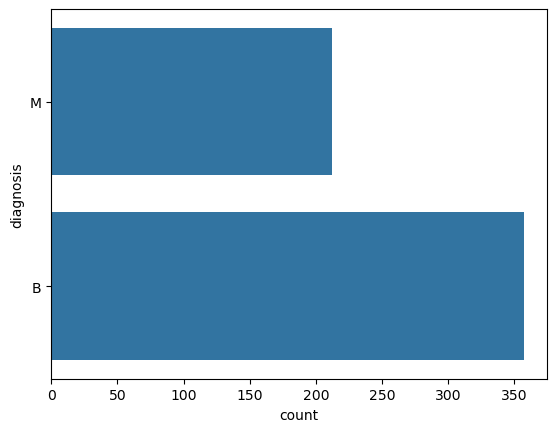

                 radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean         1.000000      0.323782        0.997855   0.987357   
texture_mean        0.323782      1.000000        0.329533   0.321086   
perimeter_mean      0.997855      0.329533        1.000000   0.986507   
area_mean           0.987357      0.321086        0.986507   1.000000   
smoothness_mean     0.170581     -0.023389        0.207278   0.177028   

                 smoothness_mean  compactness_mean  concavity_mean  \
radius_mean             0.170581          0.506124        0.676764   
texture_mean           -0.023389          0.236702        0.302418   
perimeter_mean          0.207278          0.556936        0.716136   
area_mean               0.177028          0.498502        0.685983   
smoothness_mean         1.000000          0.659123        0.521984   

                 concave points_mean  symmetry_mean  fractal_dimension_mean  
radius_mean                 0.822529       0.147741           

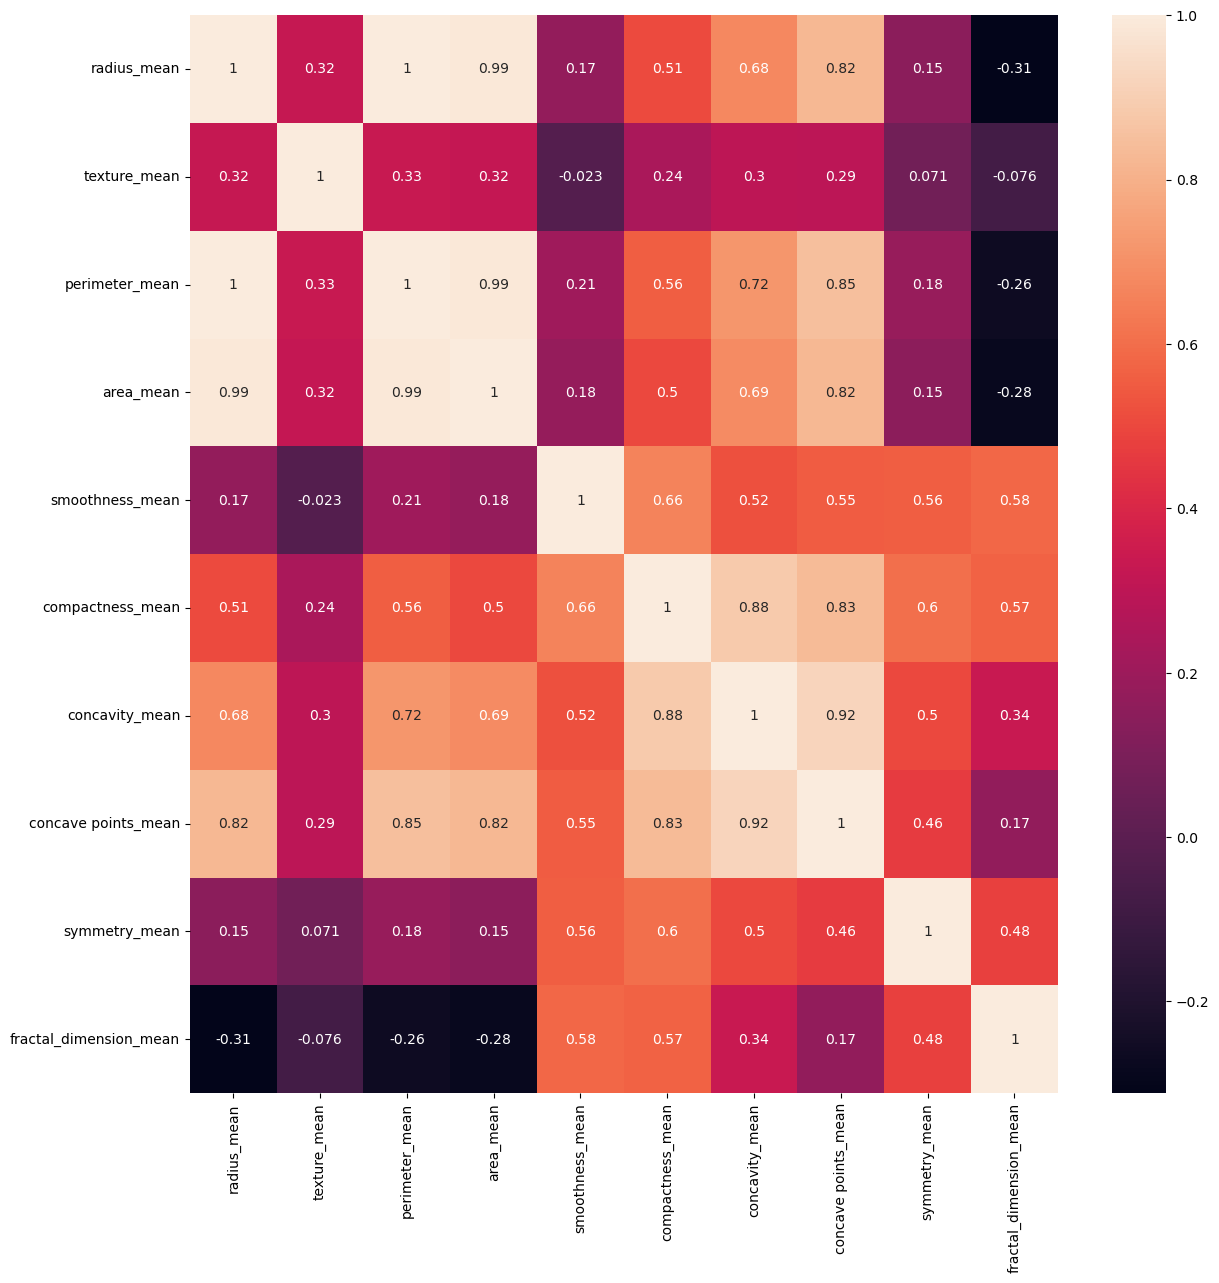

In [21]:
# 虽然我写的也能跑（就是准确率每次波动特别大；是不是就是因为过拟合了所以测试集一变泛化能力就很差？？？)
# 但是捏 你是基本上完全不进行特征选择（即降维 减少过拟合）啊！！！！！！我服了

# 这里重点介绍专栏中老师的特征选择及其他数据处理过程！！！！

# 观察上示数据，发现虽然有32个字段其实真正的特征只有十个，每个分成了mean/SE/worst (i.e. maximum)。
# 所以我们用mean这一列进行DataFrame.corr()找到correlation，并通过heatmap可视化
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['diagnosis'],label='Count')
plt.show()
# 不把qualitative data转化成数值型的就不能使用corr()这种统计函数喵，所以映射一下。
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0}) # 诶诶这里不就用到了传入dict的.map()函数了嘛！！
correlation = data[data.columns[2:12]].corr()
print(correlation.head())
plt.figure(figsize=(14,14))
sns.heatmap(correlation, annot=True) # annot=True显式每个方格的数据
plt.show()

In [27]:
# 一瞬间又被逝去的生竞回忆袭击了。从来似懂非懂的生信课，相关性热图以及它的主对角线。。
# 好了快别碎碎念了

# 从颜色可以看出有几个属性相关性特别大，**只保留其中一个**进行降维。并且这次做分类只保留含mean的columns
# 保留哪一个可以看跟target的correlation，选最高的那个，然而这里并没有给出。那就保留平均下来与一组中其他的正协同最高的，即最具代表性
features2 = data[data.columns[2:12]].drop(['perimeter_mean','area_mean','compactness_mean','concave points_mean'],axis=1)
tr_f2,te_f2,tr_t2,te_t2 = train_test_split(features2,targets,test_size=0.2)

# 在训练之前，还要对数据进行规范化，让train数据与test数据在同一个量级上避免维度问题造成误差。这里使用Z-score规范化到标准正态分布上去
from sklearn.preprocessing import StandardScaler
my_scalar = StandardScaler() # 建立自己的对象，专门拟合上此训练集中特征的信息
tr_f2 = my_scalar.fit_transform(tr_f2)
te_f2 = my_scalar.transform(te_f2)
model = svm.SVC()
model.fit(tr_f2,tr_t2)
te_p2 = model.predict(te_f2)
print(te_p2[:7]) 
accuracy = accuracy_score(te_t2,te_p2)
print(f"准确率:{accuracy:.4f},是不是波动还是准确率数值都比我的那个基本毫无数据预处理的直接训练好太太太太太多了!!!!")

['B' 'M' 'M' 'B' 'B' 'B' 'B']
准确率:0.9649,是不是波动还是准确率数值都比我的那个基本毫无数据预处理的直接训练好太太太太太多了!!!!


In [31]:
# 作业题：使用LinearSVC及不进行相关性特征选择，进行训练看准确度
tr_f3,te_f3,tr_t3,te_t3 = train_test_split(data[data.columns[2:12]],targets,test_size=0.2)
model3 = svm.LinearSVC()
model3.fit(tr_f3,tr_t3)
te_p3 = model3.predict(te_f3)
print(te_p3[:7])
accuracy = accuracy_score(te_t3,te_p3)
print(f"使用LinearSVC准确率为:{accuracy},\n此时默认肿瘤是M/B这个分类事件是线性可分,且十个特征变量而不是六个。不行啊，可能过拟合了")

['B' 'B' 'B' 'M' 'M' 'M' 'M']
使用LinearSVC准确率为:0.8947368421052632,
此时默认肿瘤是M/B这个分类事件是线性可分,且十个特征变量而不是六个。不行啊，可能过拟合了
